In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('~/registrar-recommender/00_data/2013-2020/econ.csv')
df = data.groupby('Descr').filter(lambda x : len(x)>200)
data = df.dropna(subset=['Class Year']) 

In [4]:
data.head()

,Calculation ID,Subject,Catalog,Descr,Grade,Term Descr,Major 1,Minor 1,Minor 2,Minor 3,...,Certificate 2,Secondary 1,Secondary 2,Grad Year,Enrollment Start,Term Year,Semester Term,Class Year,Number Grade,Class Year Number
5,15839.4125,ECON,490,SELECTED TOPICS IN ECONOMICS,B,2013 Spring Term,Economics (BS),NaN,NaN,NaN,...,NaN,Italian Studies (AB2),NaN,2014.0,2012.0,2013.0,Spring Term,First Year Spring Term,3.0,2.0
6,15839.4125,ECON,373,CORPORATE FINANCE,B+,2012 Fall Term,Economics (BS),NaN,NaN,NaN,...,NaN,Italian Studies (AB2),NaN,2014.0,2012.0,2012.0,Fall Term,First Year Fall Term,3.3,1.0
7,15839.4125,ECON,471,FINANCIAL MRKT AND INVESTMENTS,B+,2013 Fall Term,Economics (BS),NaN,NaN,NaN,...,NaN,Italian Studies (AB2),NaN,2014.0,2012.0,2013.0,Fall Term,Second Year Fall Term,3.3,3.0
13,19857.1625,ECON,375,ECON OF ENTREPRENEURSHIP,A,2012 Fall Term,Economics (BS),Psychology (MIN),NaN,NaN,...,NaN,NaN,NaN,2013.0,2012.0,2012.0,Fall Term,First Year Fall Term,4.0,1.0
16,19920.5375,ECON,373,CORPORATE FINANCE,B+,2013 Fall Term,Economics (BS),Asian & Mid East Studies (MIN),NaN,NaN,...,NaN,NaN,NaN,2014.0,2012.0,2013.0,Fall Term,Second Year Fall Term,3.3,3.0


In [5]:
# set Class Year Number as students' class year
data['Class Year Number'] = 0
data.loc[data['Class Year'] == 'First Year Fall Term', 'Class Year Number'] = 1
data.loc[data['Class Year'] == 'First Year Spring Term', 'Class Year Number'] = 2
data.loc[data['Class Year'] == 'Second Year Fall Term', 'Class Year Number'] = 3
data.loc[data['Class Year'] == 'Second Year Spring Term', 'Class Year Number'] = 4
data.loc[data['Class Year'] == 'Third Year Fall Term', 'Class Year Number'] = 5
data.loc[data['Class Year'] == 'Third Year Spring Term', 'Class Year Number'] = 6
data.loc[data['Class Year'] == 'Fourth Year Fall Term', 'Class Year Number'] = 7
data.loc[data['Class Year'] == 'Fourth Year Spring Term', 'Class Year Number'] = 8

/Users/josephlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/josephlee/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [6]:
data = data.rename(columns={"Calculation ID": "ID"})
# save class years separately 
data_1 = data[data['Class Year Number'] == 1]
data_2 = data[data['Class Year Number'] == 2]
data_3 = data[data['Class Year Number'] == 3]
data_4 = data[data['Class Year Number'] == 4]


In [31]:
# create sparse matrix by each student
ohe1_ = pd.get_dummies(data_1.Descr).groupby(data_1.ID).sum().reset_index()
ohe2_ = pd.get_dummies(data_2.Descr).groupby(data_2.ID).sum().reset_index()
ohe3_ = pd.get_dummies(data_3.Descr).groupby(data_3.ID).sum().reset_index()
ohe4_ = pd.get_dummies(data_4.Descr).groupby(data_4.ID).sum().reset_index()
set1 = set(ohe1_['ID'].values)
set2 = set(ohe2_['ID'].values)
set3 = set(ohe3_['ID'].values)
set4 = set(ohe4_['ID'].values)
set_difference1 = set1-set2
set_difference2 = set2-set1
set_difference2_3 = set2-set3
set_difference3_2 = set3-set2



In [8]:
ohe1_f = ohe1_[~ohe1_['ID'].isin(set_difference1)]
ohe2_f = ohe2_[~ohe2_['ID'].isin(set_difference2)]


In [9]:
len(ohe2_f)

1156

In [10]:
# get all courses name from each year
row_t1 = data_1['Descr'].value_counts().index
row_t2 = data_2['Descr'].value_counts().index
row_t3 = data_3['Descr'].value_counts().index
row_t4 = data_4['Descr'].value_counts().index


In [11]:
# set students' ID as index, instead of a default number.
ohe1t_1 = ohe1_f.set_index(ohe1_f.columns[0])
ohe2t_1 = ohe2_f.set_index(ohe2_f.columns[0])
# ohe2tf_1 = ohe2f_.set_index(ohe1_.columns[0])
# ohe3t_1 = ohe3_.set_index(ohe1_.columns[0])
# ohe4tf_1 = ohe4f_.set_index(ohe1_.columns[0])

In [12]:
transt1_2 = ohe1t_1.T.dot(ohe2t_1)


In [13]:
transt1_2_sub = transt1_2.loc[row_t1]


In [14]:
transt1_2m = transt1_2_sub[row_t2]
row_sum = transt1_2m.sum(axis=1).to_frame()
transt1_2mc = transt1_2m.div(transt1_2m.sum(axis=1), axis=0)


In [15]:
transt1_2mc_r = transt1_2mc.reset_index()
transt1_2mc_m = pd.melt(transt1_2mc_r, 
            id_vars='index', 
            value_vars=list(transt1_2mc_r.columns[1:]), # list of days of the week
            var_name='post_class', 
            value_name='prob')
trans1_2 = transt1_2mc_m[transt1_2mc_m['prob']>0.1]

In [16]:
trans1_2

,index,post_class,prob
1,ECONOMIC PRINCIPLES,ACADEMIC WRITING,0.228873
2,INTERMEDIATE MICROECONOMICS I,ACADEMIC WRITING,0.166344
3,FIRST-YEAR SEMINAR (TOP),ACADEMIC WRITING,0.360465
4,MULTIVARIABLE CALCULUS,ACADEMIC WRITING,0.239295
5,INTRO TO COMPUTER SCIENCE,ACADEMIC WRITING,0.199234
...,...,...,...
664,HONORS SEMINAR I,RESEARCH INDEPENDENT STUDY,0.142857
669,RESEARCH INDEPENDENT STUDY,RESEARCH INDEPENDENT STUDY,0.307692
670,SELECTED TOPICS IN ECONOMICS,RESEARCH INDEPENDENT STUDY,0.142857
689,CORPORATE FINANCE,FINANCIAL MRKT AND INVESTMENTS,0.111111


In [17]:
ego = set(trans1_2['index'].value_counts().index)

In [18]:
alter = set(trans1_2['post_class'].value_counts().index)

In [19]:
len(ego.union(alter))

28

In [20]:
class_list1_2=list(ego.union(alter))

In [21]:
df_class = pd.DataFrame(class_list1_2,columns=['class_name'])

In [22]:
df_class.index = np.arange(1, len(df_class) + 1)

In [23]:
df_attr1_2_econ = df_class.reset_index()

In [24]:
df_attr1_2_econ.to_csv('semester1to2_econ_attr.csv')


In [25]:
class_map = pd.Series(df_class.index.values,index=df_class.class_name).to_dict()

In [26]:
df_attr1_2_econ

,index,class_name
0,1,INTERMEDIATE MACROECONOMICS
1,2,INTERMEDIATE FINANCE
2,3,LABORATORY CALCULUS II
3,4,PROBABILITY
4,5,SELECTED TOPICS IN ECONOMICS
5,6,THE DYNAMIC EARTH
6,7,INTRO TO COMPUTER SCIENCE
7,8,INTRODUCTORY PSYCHOLOGY
8,9,SPECIAL TOPICS
9,10,HONORS SEMINAR I


In [27]:
trans1_2["index"] = trans1_2["index"].map(class_map) 
trans1_2["post_class"] = trans1_2["post_class"].map(class_map) 


/Users/josephlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/josephlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
trans1_2

,index,post_class,prob
1,17,13,0.228873
2,28,13,0.166344
3,18,13,0.360465
4,12,13,0.239295
5,7,13,0.199234
...,...,...,...
664,10,27,0.142857
669,27,27,0.307692
670,5,27,0.142857
689,14,20,0.111111


In [29]:
trans1_2.to_csv('semester1to2_econ_node.csv')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12354b518>]],
      dtype=object)

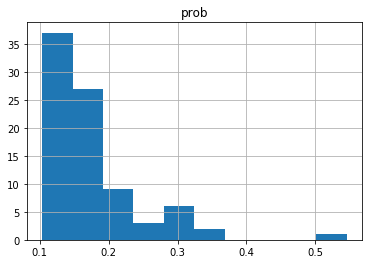

In [30]:
trans1_2.hist(column = 'prob')

In [32]:
# Dichotomize 
trans1_2.loc[trans1_2.prob >0.3, "prob"] = 1
trans1_2.loc[trans1_2.prob <= 0.3 , "prob"] = 0.1


/Users/josephlee/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [33]:
trans1_2

,index,post_class,prob
1,404,175,0.1
3,443,175,0.1
4,685,175,0.1
5,359,175,0.1
6,269,175,0.1
...,...,...,...
525409,107,702,0.1
526743,158,470,0.1
526861,470,470,0.1
528816,571,265,0.1


In [34]:
trans1_2.to_csv('semester1to2_econ_node_di.csv')


In [127]:
#semester 2 to semester 3 
set_difference2_3 = set2-set3
set_difference3_2 = set3-set2
ohe23_f = ohe2_[~ohe2_['ID'].isin(set_difference2_3)]
ohe32_f = ohe3_[~ohe3_['ID'].isin(set_difference3_2)]
ohe2t_1f = ohe23_f.set_index(ohe23_f.columns[0])
ohe3t_1f = ohe32_f.set_index(ohe32_f.columns[0])
transt2_3 = ohe2t_1f.T.dot(ohe3t_1f)


In [128]:
transt2_3_sub = transt2_3.loc[row_t2]
transt2_3m = transt2_3_sub[row_t3]
transt2_3mc = transt2_3m.div(transt2_3m.sum(axis=1), axis=0)
transt2_3mc_r = transt2_3mc.reset_index()
transt2_3mc_m = pd.melt(transt2_3mc_r, 
            id_vars='index', 
            value_vars=list(transt2_3mc_r.columns[1:]), # list of days of the week
            var_name='post_class', 
            value_name='prob')
trans2_3 = transt2_3mc_m[transt2_3mc_m['prob']>0.1]

In [129]:
trans2_3

,index,post_class,prob
36,BIO BASES OF BEHAVIOR,INTRODUCTION TO ECONOMETRICS,0.105727
77,DUKE-ADM ST ABR: ADV TOP,INTRODUCTION TO ECONOMETRICS,0.105590
97,CONNECTIONS IN ENERGY: PROJECT,INTRODUCTION TO ECONOMETRICS,0.110000
100,UNDERSTANDING FIN CRISES,INTRODUCTION TO ECONOMETRICS,0.117117
112,ABNORMAL PSYCHOLOGY,INTRODUCTION TO ECONOMETRICS,0.116883
...,...,...,...
1303692,SENIOR SEMINAR IN SPC,INTRO TO POLITICAL PHILOSOPHY,0.111111
1303998,ECON GROWTH & DEV POLICY,INTRO TO POLITICAL PHILOSOPHY,0.111111
1304113,POLITICAL REGIME TRANSITIONS,INTRO TO POLITICAL PHILOSOPHY,0.111111
1312431,MULTIMEDIA DOCUMENTARY,SIGNATURE COURSE (TOP),0.125000


In [130]:
ego2 = set(trans2_3['index'].value_counts().index)
alter2 = set(trans2_3['post_class'].value_counts().index)
class_list2_3=list(ego2.union(alter2))
df_class2 = pd.DataFrame(class_list2_3,columns=['class_name'])
df_class2.index = np.arange(1, len(df_class2) + 1)
df_attr2_3_econ = df_class2.reset_index()
df_attr2_3_econ.to_csv('class2to3_econ_attr.csv')


In [131]:
class_map2 = pd.Series(df_class2.index.values,index=df_class2.class_name).to_dict()
trans2_3["index"] = trans2_3["index"].map(class_map2) 
trans2_3["post_class"] = trans2_3["post_class"].map(class_map2) 

trans2_3.to_csv('class2to3_econ_node.csv')


/Users/josephlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/josephlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [133]:
trans2_3

,index,post_class,prob
36,284,616,0.105727
77,659,616,0.105590
97,683,616,0.110000
100,1094,616,0.117117
112,7,616,0.116883
...,...,...,...
1303692,214,920,0.111111
1303998,944,920,0.111111
1304113,199,920,0.111111
1312431,461,122,0.125000


In [134]:
data2 = pd.read_csv('~/registrar-recommender/00_data/2013-2020/courses_and_degrees_2013_2020.csv')

/Users/josephlee/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [111]:
data = data2.dropna(subset=['Class Year']) 

In [112]:
# set Class Year Number as students' class year
data['Class Year Number'] = 0
data.loc[data['Class Year'] == 'First Year Fall Term', 'Class Year Number'] = 1
data.loc[data['Class Year'] == 'First Year Spring Term', 'Class Year Number'] = 1
data.loc[data['Class Year'] == 'Second Year Fall Term', 'Class Year Number'] = 2
data.loc[data['Class Year'] == 'Second Year Spring Term', 'Class Year Number'] = 2
data.loc[data['Class Year'] == 'Third Year Fall Term', 'Class Year Number'] = 3
data.loc[data['Class Year'] == 'Third Year Spring Term', 'Class Year Number'] = 3
data.loc[data['Class Year'] == 'Fourth Year Fall Term', 'Class Year Number'] = 4
data.loc[data['Class Year'] == 'Fourth Year Spring Term', 'Class Year Number'] = 4

In [113]:
data = data.rename(columns={"Calculation ID": "ID"})
# save class years separately 
data_1 = data[data['Class Year Number'] == 1]
# data_11 = data[data['Class Year'] == 'Third Year Fall Term', 'Class Year Number']
# data_12 = data[data['Class Year'] == 'Third Year Fall Term', 'Class Year Number']
data_2 = data[data['Class Year Number'] == 2]
data_3 = data[data['Class Year Number'] == 3]
data_4 = data[data['Class Year Number'] == 4]

# df_1 = data_1.groupby('Descr').filter(lambda x : len(x)>5)
# df_2 = data_2.groupby('Descr').filter(lambda x : len(x)>5)

In [114]:
# create sparse matrix by each student
ohe1_ = pd.get_dummies(data_1.Descr).groupby(data_1.ID).sum().reset_index()
ohe2_ = pd.get_dummies(data_2.Descr).groupby(data_2.ID).sum().reset_index()
ohe3_ = pd.get_dummies(data_3.Descr).groupby(data_3.ID).sum().reset_index()
ohe4_ = pd.get_dummies(data_4.Descr).groupby(data_4.ID).sum().reset_index()
set1 = set(ohe1_['ID'].values)
set2 = set(ohe2_['ID'].values)
set3 = set(ohe3_['ID'].values)
set4 = set(ohe4_['ID'].values)
set_difference1 = set1-set2
set_difference2 = set2-set1

set_difference1

{24588.25,
 23354.45,
 24604.3625,
 24604.4125,
 24625.6375,
 24626.05,
 24634.325,
 24636.3375,
 24637.8125,
 24637.9,
 24639.2375,
 24638.375,
 24639.35,
 24640.6625,
 24641.4875,
 24643.625,
 24650.85,
 8288.3375,
 24747.375,
 24749.125,
 24767.7125,
 24777.5875,
 24778.225,
 24793.15,
 24837.275,
 23356.075,
 23356.2625,
 23356.325,
 24859.2,
 23395.65,
 24936.8375,
 25018.05,
 23396.2125,
 23396.775,
 23397.8,
 23397.9875,
 25133.7,
 25146.9625,
 23397.025,
 25186.225,
 25211.3,
 25226.4125,
 25238.15,
 25240.375,
 25242.3875,
 25281.3625,
 25287.775,
 8919.2,
 25330.95,
 25339.775,
 25341.7875,
 25410.0375,
 25485.325,
 25629.575,
 25677.7875,
 23398.3,
 23398.05,
 23398.1125,
 17544.3625,
 25743.6125,
 17564.35,
 25767.5375,
 25786.275,
 25841.0625,
 17669.6375,
 25954.525,
 26068.1625,
 26087.65,
 26242.0125,
 26260.9375,
 18110.4375,
 18183.7,
 23356.4875,
 23356.8,
 23356.8625,
 23356.1125,
 18203.2625,
 23395.375,
 23395.5625,
 23395.875,
 26452.825,
 26462.45,
 26464.1125,


In [115]:
ohe1_f = ohe1_[~ohe1_['ID'].isin(set_difference1)]
ohe2_f = ohe2_[~ohe2_['ID'].isin(set_difference2)]

In [116]:
len(ohe2_f)

11428

In [117]:
# get all courses name from each year
row_t1 = data_1['Descr'].value_counts().index
row_t2 = data_2['Descr'].value_counts().index
row_t3 = data_3['Descr'].value_counts().index
row_t4 = data_4['Descr'].value_counts().index

In [118]:
# set students' ID as index, instead of a default number.
ohe1t_1 = ohe1_f.set_index(ohe1_f.columns[0])
ohe2t_1 = ohe2_f.set_index(ohe2_f.columns[0])
# ohe2tf_1 = ohe2f_.set_index(ohe1_.columns[0])
# ohe3t_1 = ohe3_.set_index(ohe1_.columns[0])
# ohe4tf_1 = ohe4f_.set_index(ohe1_.columns[0])

In [119]:
transt1_2 = ohe1t_1.T.dot(ohe2t_1)
transt1_2_sub = transt1_2.loc[row_t1]
transt1_2m = transt1_2_sub[row_t2]
row_sum = transt1_2m.sum(axis=1).to_frame()
transt1_2mc = transt1_2m.div(transt1_2m.sum(axis=1), axis=0)


In [120]:
transt1_2mc_r = transt1_2mc.reset_index()
transt1_2mc_m = pd.melt(transt1_2mc_r, 
            id_vars='index', 
            value_vars=list(transt1_2mc_r.columns[1:]), # list of days of the week
            var_name='post_class', 
            value_name='prob')
trans1_2 = transt1_2mc_m[transt1_2mc_m['prob']>0.1]

In [122]:
trans1_2.to_csv('all_class1to2.csv')
